Import Packages

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the Data

In [2]:
parent_dir = '../../data/fib/'

N = 30
ITERATIONS = 15
# Load Scala benchmark data
scala_idle_raw_data = pd.read_csv(f'{parent_dir}2/fibonacci_akka_actor_benchmark_idle_power.csv')
scala_bench_raw_data = pd.read_csv(f'{parent_dir}2/fibonacci_akka_actor_benchmark_power_metrics.csv')

# Load Erlang benchmark data
erlang_idle_raw_data = pd.read_csv(f'{parent_dir}2/fibonacci_benchmark_idle_power.csv')
erlang_bench_raw_data = pd.read_csv(f'{parent_dir}2/fibonacci_benchmark_power_metrics.csv')

# Replace empty or missing values with "N/A" in non-numeric columns
scala_idle_raw_data.fillna("N/A", inplace=True)
scala_bench_raw_data.fillna("N/A", inplace=True)
erlang_idle_raw_data.fillna("N/A", inplace=True)
erlang_bench_raw_data.fillna("N/A", inplace=True)

Preview the Data

In [3]:
print("Scala Idle Raw Data:")
print(scala_idle_raw_data.shape)
scala_idle_raw_data.head()

Scala Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Mon Mar 17 11:55:37 2025 +0100) (510.43ms ela...,7.05,0.0477,0.665,7.64,0.82,42.89,61.92 C,Nominal
1,(Mon Mar 17 11:55:38 2025 +0100) (504.88ms ela...,10.70,0.2190,1.350,12.30,1.57,77.49,61.92 C,Nominal
2,(Mon Mar 17 11:55:38 2025 +0100) (508.20ms ela...,12.30,0.2290,1.660,13.78,2.21,82.37,61.62 C,Nominal
3,(Mon Mar 17 11:55:39 2025 +0100) (505.89ms ela...,2.13,0.1100,1.060,3.26,1.30,57.01,61.62 C,Nominal
4,(Mon Mar 17 11:55:39 2025 +0100) (508.61ms ela...,1.19,0.0240,0.670,1.90,0.84,41.52,61.16 C,Nominal


In [4]:
print("Scala Benchmark Raw Data:")
print(scala_bench_raw_data.shape)
scala_bench_raw_data.head()

Scala Benchmark Raw Data:
(198, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Mon Mar 17 11:55:49 2025 +0100) (1008.87ms el...,38.3,0.095300,1.34,41.04,3.81,98.78,64.57 C,Nominal
1,(Mon Mar 17 11:55:50 2025 +0100) (1005.13ms el...,41.0,0.050300,1.34,44.64,4.00,99.95,68.18 C,Nominal
2,(Mon Mar 17 11:55:51 2025 +0100) (1005.55ms el...,40.9,0.026500,1.26,44.30,3.99,99.84,71.11 C,Nominal
3,(Mon Mar 17 11:55:52 2025 +0100) (1005.18ms el...,41.0,0.000182,1.48,44.59,3.97,99.67,73.70 C,Nominal
4,(Mon Mar 17 11:55:53 2025 +0100) (1004.86ms el...,40.7,0.000000,1.25,44.04,3.97,99.73,76.07 C,Nominal


In [5]:
print("Erlang Idle Raw Data:")
print(erlang_idle_raw_data.shape)
erlang_idle_raw_data.head()

Erlang Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Mon Mar 17 12:01:48 2025 +0100) (508.84ms ela...,12.800,0.0603,1.180,13.90,1.75,98.42,53.74 C,Nominal
1,(Mon Mar 17 12:01:49 2025 +0100) (504.89ms ela...,9.680,0.1110,0.741,11.23,1.24,56.46,53.74 C,Nominal
2,(Mon Mar 17 12:01:49 2025 +0100) (505.75ms ela...,6.120,0.0957,1.010,7.11,1.18,51.75,54.63 C,Nominal
3,(Mon Mar 17 12:01:50 2025 +0100) (508.05ms ela...,0.679,0.0399,0.514,1.24,0.47,29.03,54.63 C,Nominal
4,(Mon Mar 17 12:01:51 2025 +0100) (508.75ms ela...,0.172,0.0000,0.279,0.35,0.10,6.90,54.33 C,Nominal


In [6]:
print("Erlang Benchmark Raw Data:")
print(erlang_bench_raw_data.shape)
erlang_bench_raw_data.head()

Erlang Benchmark Raw Data:
(46, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Mon Mar 17 12:02:01 2025 +0100) (1008.06ms el...,36.2,0.1130,2.82,40.78,4.00,99.98,59.01 C,Nominal
1,(Mon Mar 17 12:02:02 2025 +0100) (1005.29ms el...,37.8,0.0484,2.54,42.05,4.00,99.97,62.39 C,Nominal
2,(Mon Mar 17 12:02:03 2025 +0100) (1005.08ms el...,33.7,0.0225,2.47,37.81,3.93,98.92,64.18 C,Nominal
3,(Mon Mar 17 12:02:04 2025 +0100) (1004.93ms el...,32.6,0.0250,1.85,36.50,3.40,97.32,66.02 C,Nominal
4,(Mon Mar 17 12:02:05 2025 +0100) (1004.87ms el...,36.7,0.0312,2.66,41.49,3.96,99.54,68.95 C,Nominal


Clean the Data

In [7]:
def clean_data(df):
    df_copy = df.copy() 
    
    # Convert Timestamp to datetime format (extract date-time pattern)
    df_copy['Timestamp'] = pd.to_datetime(
        df['Timestamp'].str.extract(r'(\w{3} \w{3} \d{1,2} \d{2}:\d{2}:\d{2} \d{4})')[0], 
        errors='coerce'
    )

    # Extract elapsed time in milliseconds
    df_copy['Time Elapsed (ms)'] = pd.to_numeric(
        df['Timestamp'].str.extract(r'\((\d+\.\d+)ms elapsed\)')[0], 
        errors='coerce'
    )
    
    # Extract numeric temperature values
    df_copy['CPU Temp(C)'] = df['CPU Temp(C)'].str.extract(r'(\d+\.\d+|\d+)').astype(float)

    # Fill N/A values with 0 for numerical columns
    df_copy = df_copy.fillna(0)
    
    return df_copy

In [8]:
scala_idle_data = clean_data(scala_idle_raw_data)
scala_bench_data = clean_data(scala_bench_raw_data)
erlang_idle_data = clean_data(erlang_idle_raw_data)
erlang_bench_data = clean_data(erlang_bench_raw_data)

Verify Cleaned Data

In [9]:
print("Scala Idle Clean Data:")
print(scala_idle_data.shape)
scala_idle_data.head()

Scala Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-17 11:55:37,7.05,0.0477,0.665,7.64,0.82,42.89,61.92,Nominal,510.43
1,2025-03-17 11:55:38,10.70,0.2190,1.350,12.30,1.57,77.49,61.92,Nominal,504.88
2,2025-03-17 11:55:38,12.30,0.2290,1.660,13.78,2.21,82.37,61.62,Nominal,508.20
3,2025-03-17 11:55:39,2.13,0.1100,1.060,3.26,1.30,57.01,61.62,Nominal,505.89
4,2025-03-17 11:55:39,1.19,0.0240,0.670,1.90,0.84,41.52,61.16,Nominal,508.61


In [10]:
print("Scala Benchmark Clean Data:")
print(scala_bench_data.shape)
scala_bench_data.head()


Scala Benchmark Clean Data:
(198, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-17 11:55:49,38.3,0.095300,1.34,41.04,3.81,98.78,64.57,Nominal,1008.87
1,2025-03-17 11:55:50,41.0,0.050300,1.34,44.64,4.00,99.95,68.18,Nominal,1005.13
2,2025-03-17 11:55:51,40.9,0.026500,1.26,44.30,3.99,99.84,71.11,Nominal,1005.55
3,2025-03-17 11:55:52,41.0,0.000182,1.48,44.59,3.97,99.67,73.70,Nominal,1005.18
4,2025-03-17 11:55:53,40.7,0.000000,1.25,44.04,3.97,99.73,76.07,Nominal,1004.86


In [11]:
print("Erlang Idle Clean Data:")
print(erlang_idle_data.shape)
erlang_idle_data.head()


Erlang Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-17 12:01:48,12.800,0.0603,1.180,13.90,1.75,98.42,53.74,Nominal,508.84
1,2025-03-17 12:01:49,9.680,0.1110,0.741,11.23,1.24,56.46,53.74,Nominal,504.89
2,2025-03-17 12:01:49,6.120,0.0957,1.010,7.11,1.18,51.75,54.63,Nominal,505.75
3,2025-03-17 12:01:50,0.679,0.0399,0.514,1.24,0.47,29.03,54.63,Nominal,508.05
4,2025-03-17 12:01:51,0.172,0.0000,0.279,0.35,0.10,6.90,54.33,Nominal,508.75


In [12]:
print("Erlang Benchmark Clean Data:")
print(erlang_bench_data.shape)
erlang_bench_data.head()

Erlang Benchmark Clean Data:
(46, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-17 12:02:01,36.2,0.1130,2.82,40.78,4.00,99.98,59.01,Nominal,1008.06
1,2025-03-17 12:02:02,37.8,0.0484,2.54,42.05,4.00,99.97,62.39,Nominal,1005.29
2,2025-03-17 12:02:03,33.7,0.0225,2.47,37.81,3.93,98.92,64.18,Nominal,1005.08
3,2025-03-17 12:02:04,32.6,0.0250,1.85,36.50,3.40,97.32,66.02,Nominal,1004.93
4,2025-03-17 12:02:05,36.7,0.0312,2.66,41.49,3.96,99.54,68.95,Nominal,1004.87


Visualize the Data

In [13]:
def plot_graphs(idle_df, bench_df, title_prefix):
    """
    Creates side-by-side subplots for each metric, plotting idle (left) and benchmark (right),
    using elapsed time on the x-axis.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    idle_df = idle_df.copy()
    bench_df = bench_df.copy()
    
    # idle_df["Elapsed Time (s)"] = (idle_df["Timestamp"] - idle_df["Timestamp"].iloc[0]).dt.total_seconds()
    # bench_df["Elapsed Time (s)"] = (bench_df["Timestamp"] - bench_df["Timestamp"].iloc[0]).dt.total_seconds()

    # Compute elapsed time starting from t=0
    idle_df["Elapsed Time (s)"] = (idle_df["Time Elapsed (ms)"].cumsum() - idle_df["Time Elapsed (ms)"].iloc[0]) / 1000
    bench_df["Elapsed Time (s)"] = (bench_df["Time Elapsed (ms)"].cumsum() - bench_df["Time Elapsed (ms)"].iloc[0]) / 1000

    for column in columns_to_plot:
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Plot Idle data on the first subplot
        sns.lineplot(data=idle_df, x="Elapsed Time (s)", y=column, label="Idle", color='blue', linestyle='--', ax=axes[0])
        axes[0].set_title(f"Idle - {column}", fontsize=12)
        axes[0].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[0].set_ylabel(column, fontsize=10)
        axes[0].legend()
        axes[0].grid(True)

        # Plot Benchmark data on the second subplot
        sns.lineplot(data=bench_df, x="Elapsed Time (s)", y=column, label="Benchmark", color='red', ax=axes[1])
        axes[1].set_title(f"Benchmark - {column}", fontsize=12)
        axes[1].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[1].set_ylabel(column, fontsize=10)
        axes[1].legend()
        axes[1].grid(True)

        # Main figure title
        fig.suptitle(f"{title_prefix} - {column}", fontsize=14)
        
        # Adjust layout to avoid overlap
        plt.tight_layout(rect=[0, 0, 1, 0.95]) 
        plt.show()


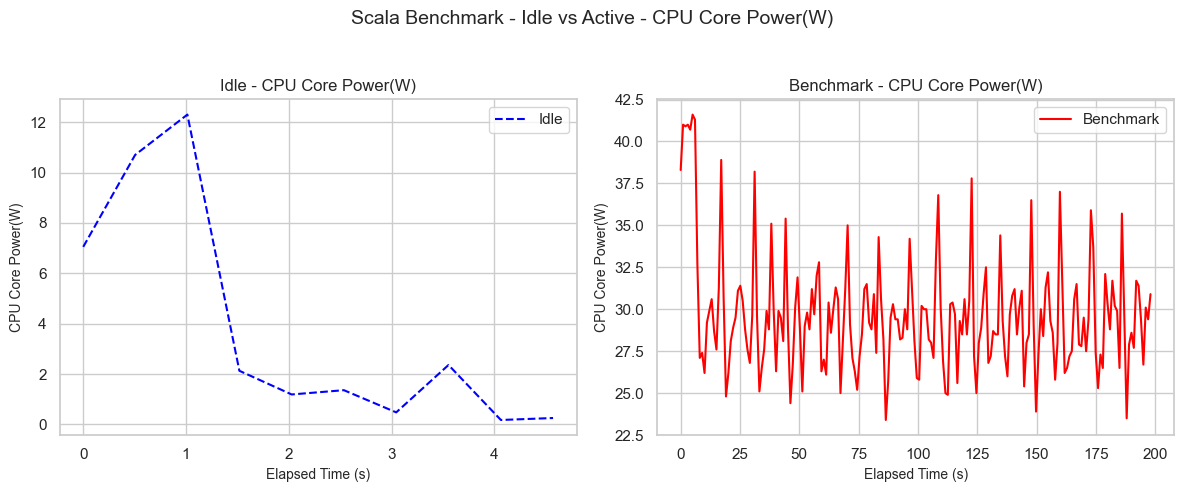

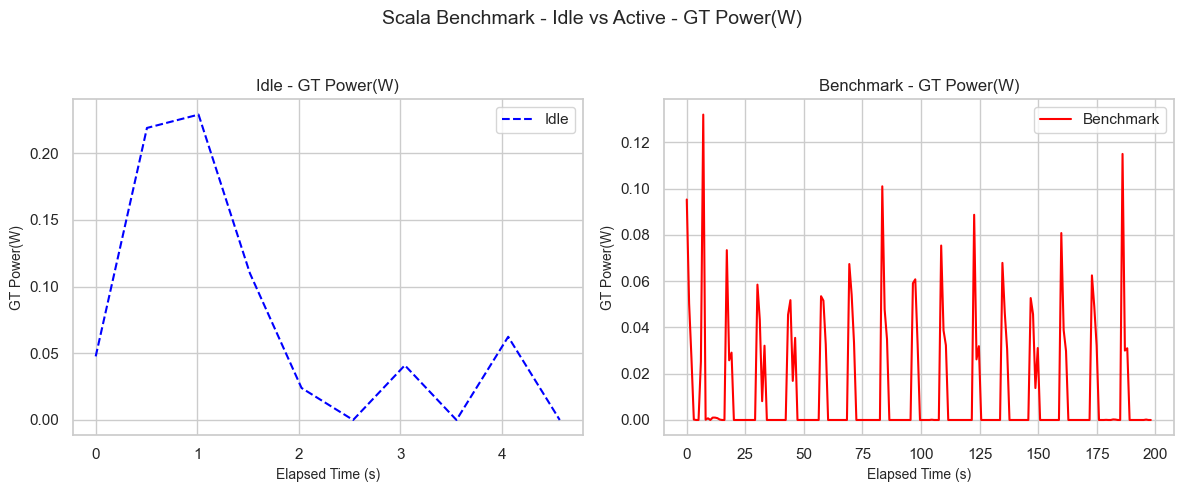

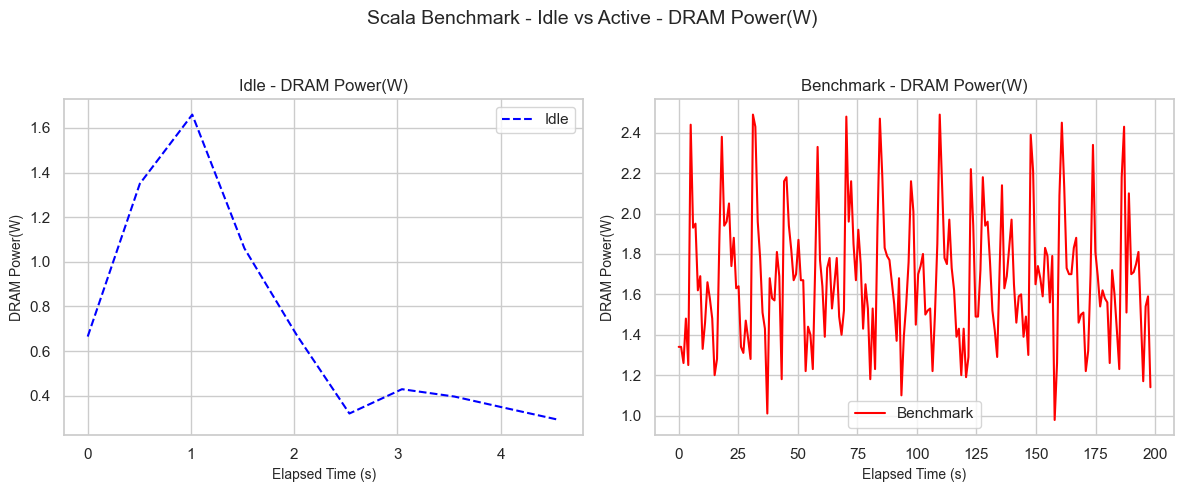

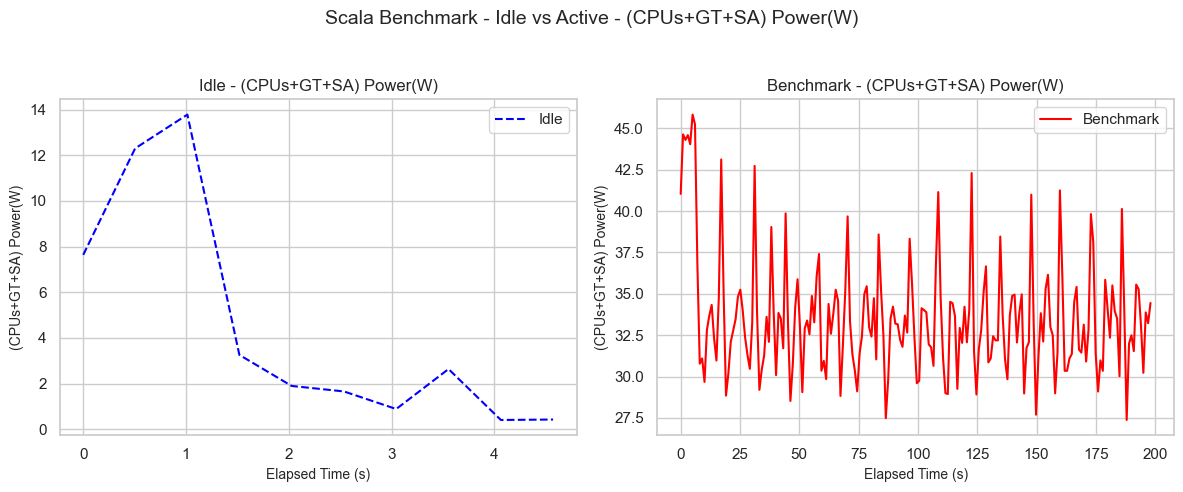

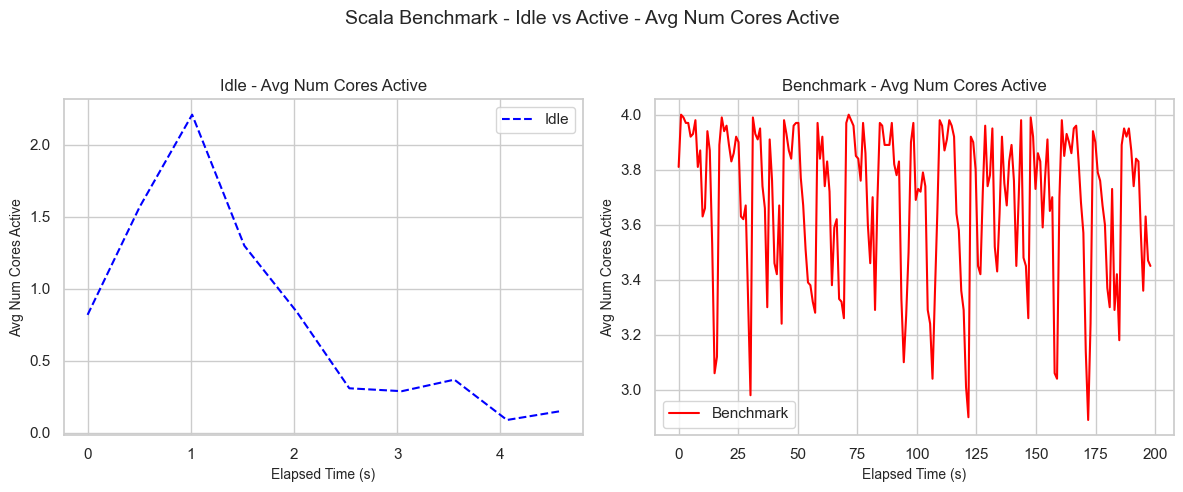

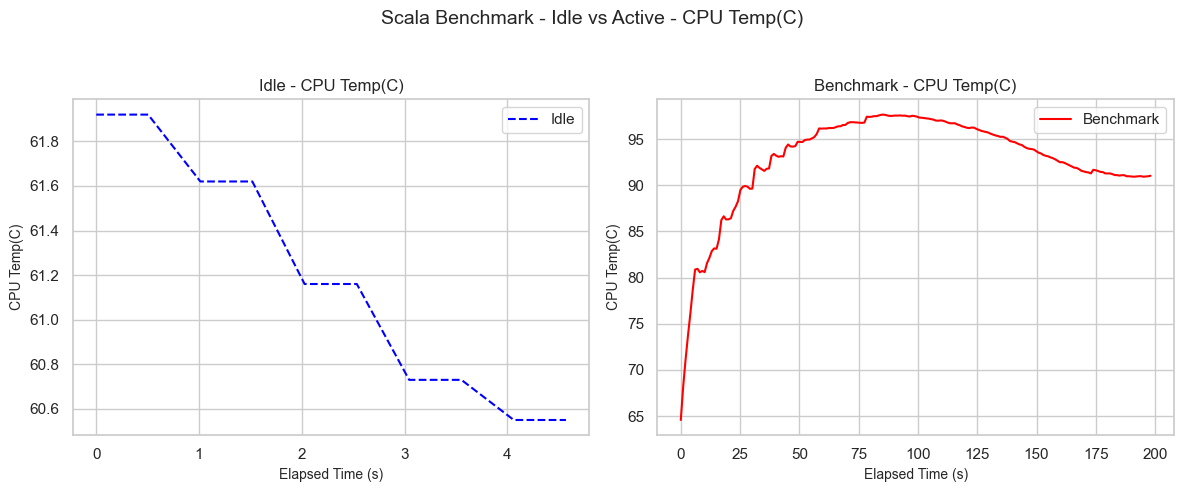

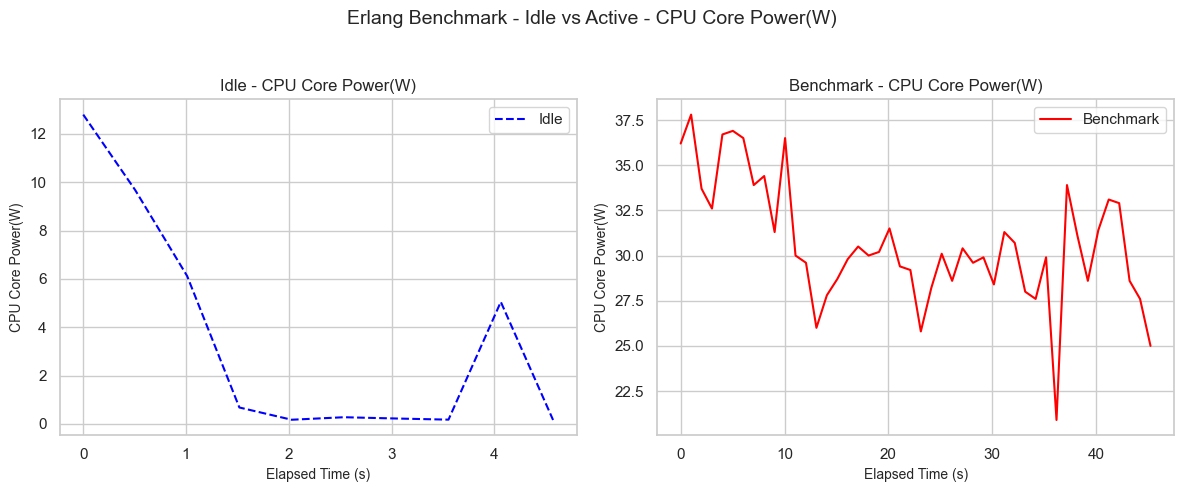

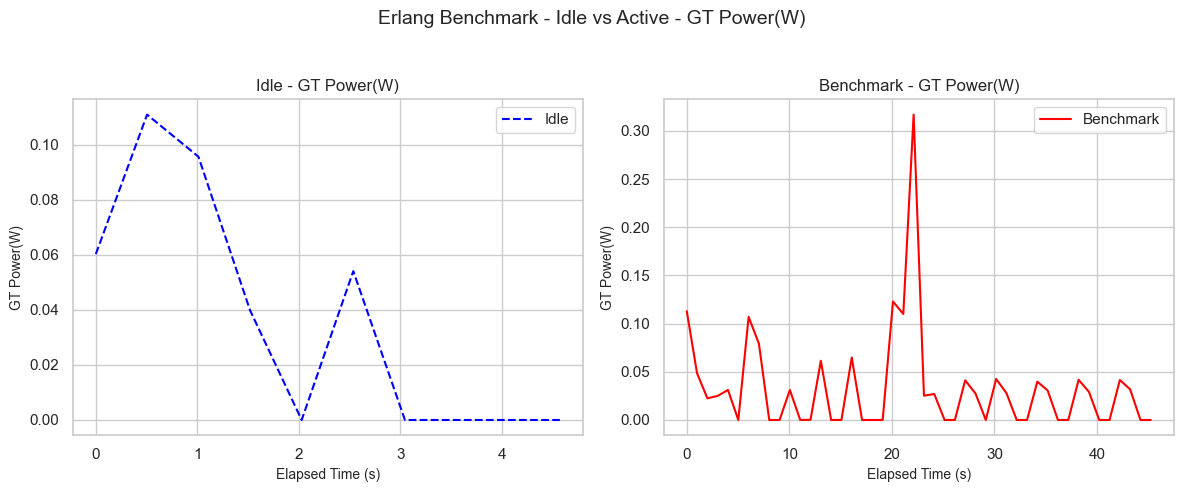

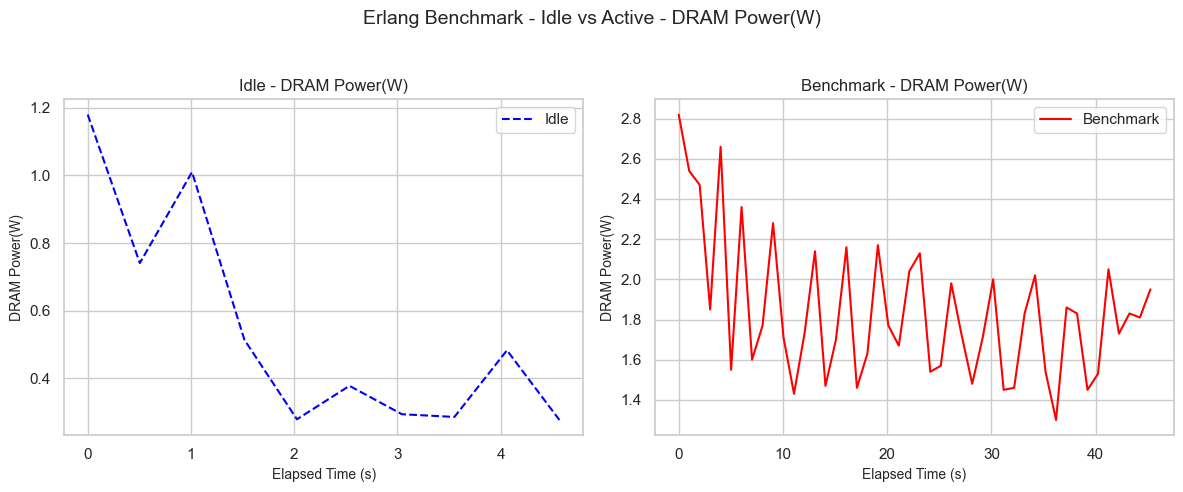

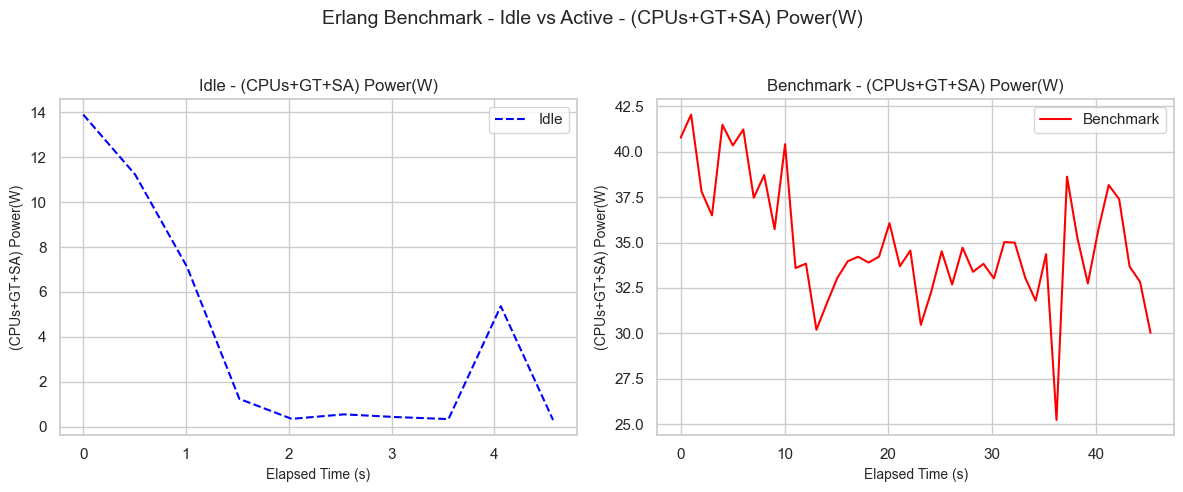

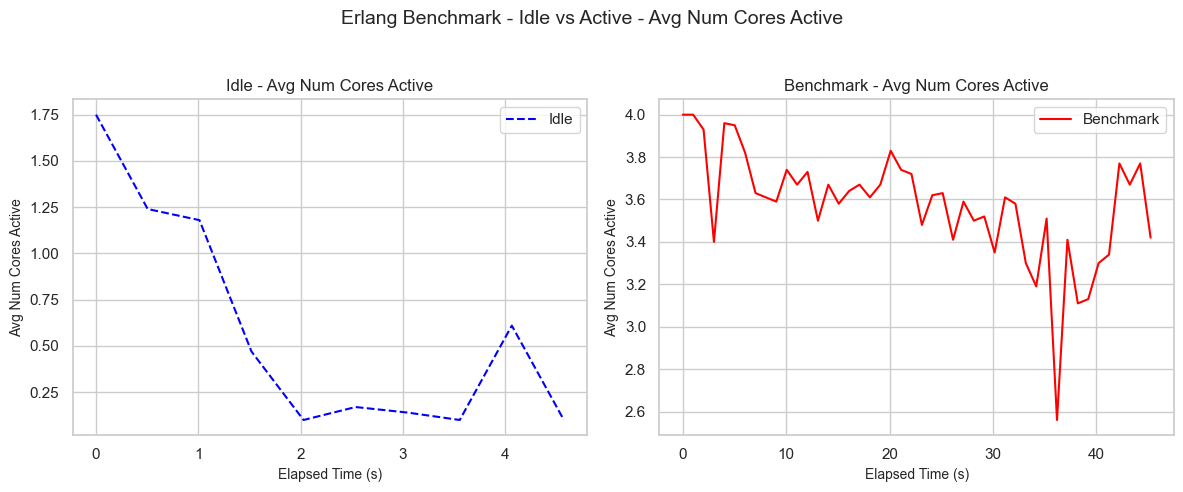

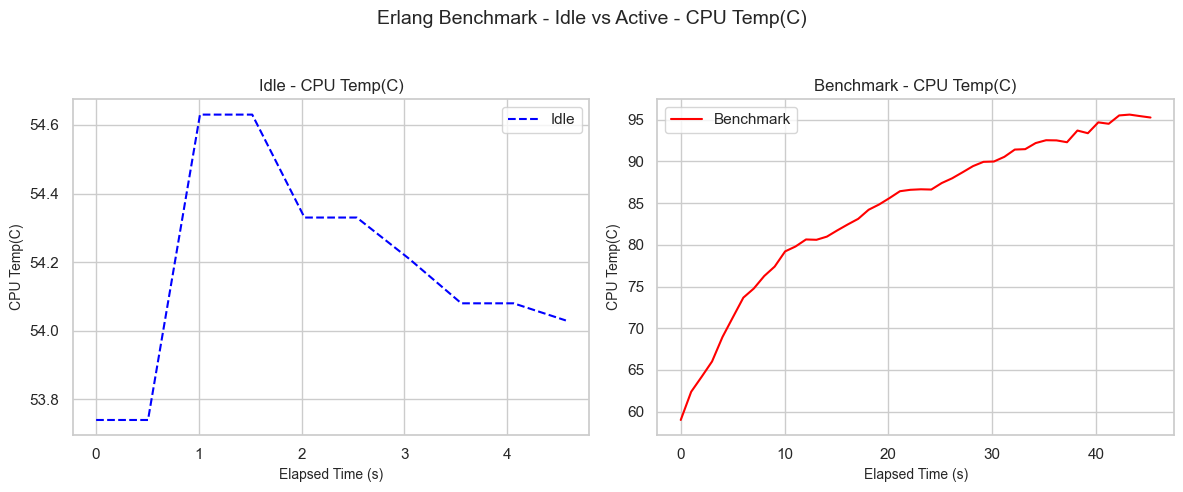

In [14]:
plot_graphs(scala_idle_data, scala_bench_data, "Scala Benchmark - Idle vs Active")
plot_graphs(erlang_idle_data, erlang_bench_data, "Erlang Benchmark - Idle vs Active")

In [15]:
def plot_erlang_vs_scala(erlang_df, scala_df, idle_erlang_df, idle_scala_df, title_prefix):
    """
    Plots Erlang and Scala benchmark data with elapsed time starting at t=0,
    after subtracting corresponding idle values.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    erlang_df = erlang_df.copy()
    scala_df = scala_df.copy()

    # Normalize elapsed time to start from t=0
    erlang_df["Elapsed Time (s)"] = (erlang_df["Time Elapsed (ms)"].cumsum() - erlang_df["Time Elapsed (ms)"].iloc[0]) / 1000
    scala_df["Elapsed Time (s)"] = (scala_df["Time Elapsed (ms)"].cumsum() - scala_df["Time Elapsed (ms)"].iloc[0]) / 1000


    for column in columns_to_plot:
        fig, ax = plt.subplots(figsize=(10, 5))

        # Subtract idle values
        erlang_df["Adjusted " + column] = np.maximum(0, erlang_df[column] - idle_erlang_df[column].mean())
        scala_df["Adjusted " + column] = np.maximum(0, scala_df[column] - idle_scala_df[column].mean())

        # Plot Erlang benchmark
        sns.lineplot(data=erlang_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Erlang", color='blue', ax=ax)

        # Plot Scala benchmark
        sns.lineplot(data=scala_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Scala", color='red', ax=ax)

        # Main figure title
        ax.set_title(f"{title_prefix} - {column}", fontsize=14)
        ax.set_xlabel("Elapsed Time (s)", fontsize=12)
        ax.set_ylabel(column, fontsize=12)
        ax.legend()
        ax.grid(True)

        plt.tight_layout()
        plt.show()


In [16]:
def format_message_count(n):
    """Formats large numbers into shortened notation (e.g., 1B, 100M, 10M)."""
    if n >= 1_000_000_000:
        return f"{n // 1_000_000_000}B"
    elif n >= 1_000_000:
        return f"{n // 1_000_000}M"
    elif n >= 1_000:
        return f"{n // 1_000}K"
    return str(n)

message_label = format_message_count(N)
title_config_prefix = f"({message_label} Index, {ITERATIONS} Iterations)"

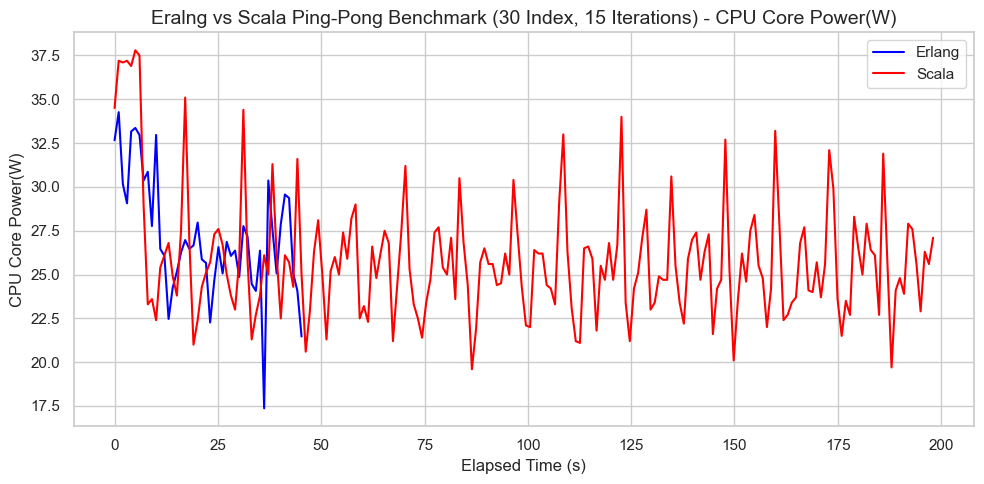

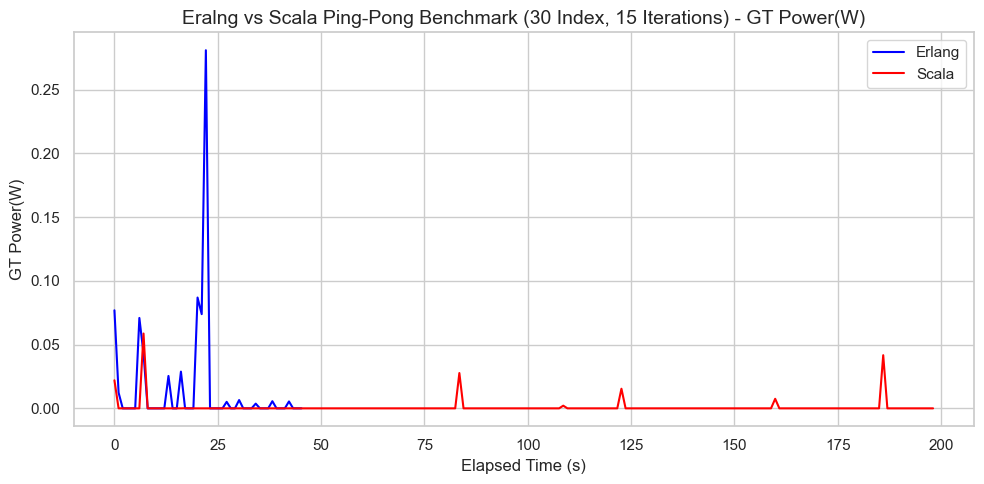

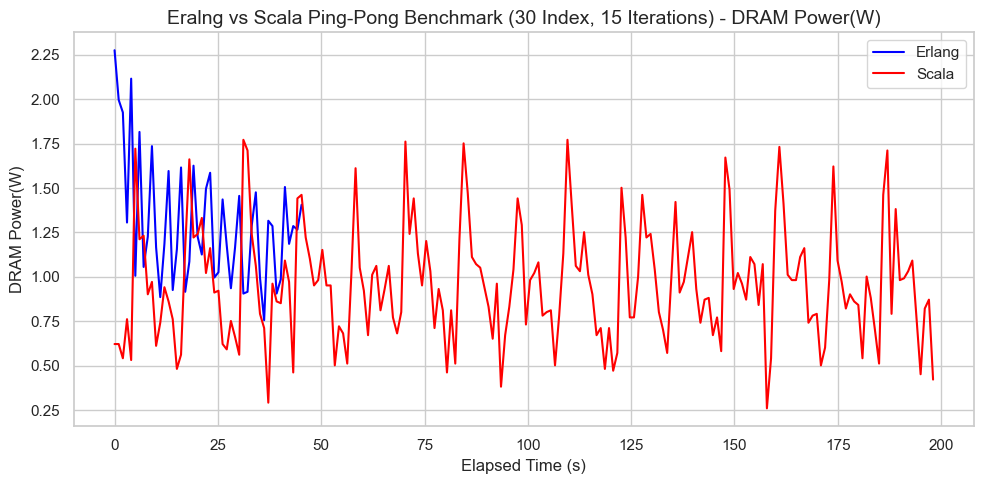

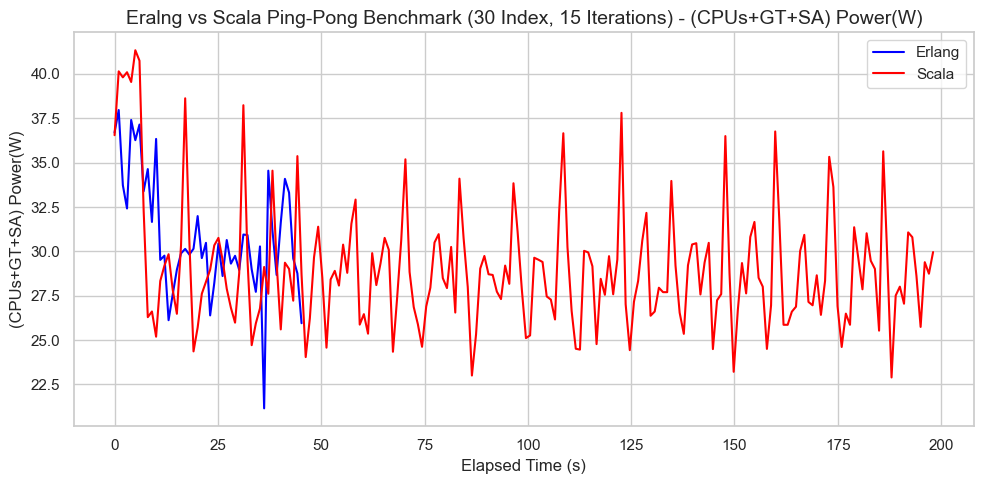

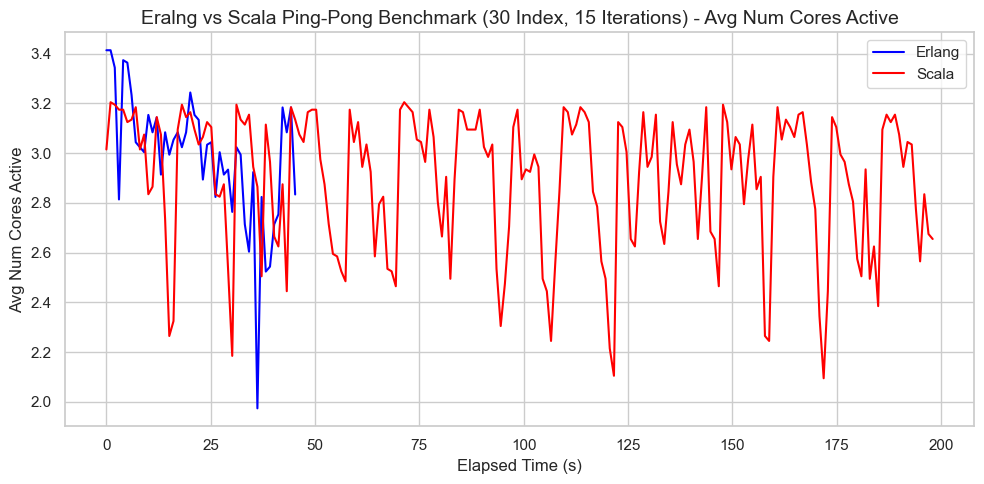

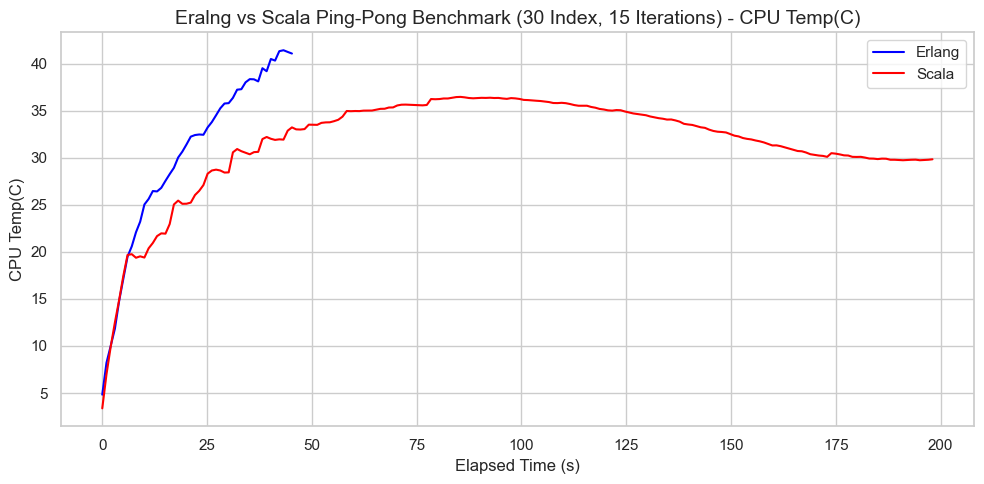

In [17]:
plot_erlang_vs_scala(erlang_bench_data, scala_bench_data, erlang_idle_data, scala_idle_data, f"Eralng vs Scala Ping-Pong Benchmark {title_config_prefix}")


Compute Average Metrics

In [18]:
metrics_columns = ["CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", "(CPUs+GT+SA) Power(W)","CPU Temp(C)", "Avg Num Cores Active"]

In [19]:
# Compute mean idle values for each metric
scala_idle_means = scala_idle_data[metrics_columns].mean()
erlang_idle_means = erlang_idle_data[metrics_columns].mean()

# Subtract the mean idle values from each row in the benchmark data
scala_net_avgs = (scala_bench_data[metrics_columns] - scala_idle_means).mean()
erlang_net_avgs = (erlang_bench_data[metrics_columns] - erlang_idle_means).mean()

print("Net Average Metrics Comparison:\n")
print("Scala Benchmark:")
print(scala_net_avgs, "\n")
print("Erlang Benchmark:")
print(erlang_net_avgs)

Net Average Metrics Comparison:

Scala Benchmark:
CPU Core Power(W)        25.861516
GT Power(W)              -0.061020
DRAM Power(W)             0.960075
(CPUs+GT+SA) Power(W)    29.061525
CPU Temp(C)              31.559000
Avg Num Cores Active      2.895303
dtype: float64 

Erlang Benchmark:
CPU Core Power(W)        27.135765
GT Power(W)              -0.002619
DRAM Power(W)             1.298191
(CPUs+GT+SA) Power(W)    30.905826
CPU Temp(C)              30.118043
Avg Num Cores Active      2.988565
dtype: float64


Compute Total Energy Consumption

In [21]:
# Calculate total elapsed time
scala_total_time = scala_bench_data["Time Elapsed (ms)"].sum() / 1000
erlang_total_time = erlang_bench_data["Time Elapsed (ms)"].sum() / 1000

# Calculate total elapsed time using timestamps (convert to seconds)
# scala_total_time = (scala_bench_data["Timestamp"].iloc[-1] - scala_bench_data["Timestamp"].iloc[0]).total_seconds()
# erlang_total_time = (erlang_bench_data["Timestamp"].iloc[-1] - erlang_bench_data["Timestamp"].iloc[0]).total_seconds()

# Compute total energy consumption
scala_total_energy = scala_net_avgs["(CPUs+GT+SA) Power(W)"] * scala_total_time
erlang_total_energy = erlang_net_avgs["(CPUs+GT+SA) Power(W)"] * erlang_total_time

# Create a DataFrame for the new row
new_row = pd.DataFrame([{
    "N": N,
    "Iterations": ITERATIONS,
    "Erlang Energy Consumption(J)": erlang_total_energy,
    "Scala Energy Consumption(J)": scala_total_energy
}])

# Define CSV file path
csv_filename = os.path.join(parent_dir, "aggregate_energy_results.csv")

# Check if the file exists
if os.path.exists(csv_filename):
    # Load existing data
    existing_data = pd.read_csv(csv_filename)
    
    # Check if the row with the same (Number of Messages, Iterations) already exists
    duplicate_row = existing_data[
        (existing_data["N"] == N) &
        (existing_data["Iterations"] == ITERATIONS)
    ]
    
    if not duplicate_row.empty:
        print("Skipping duplicate entry for N =", N, "and Iterations =", ITERATIONS)
    else:
        # Append new row
        new_row.to_csv(csv_filename, mode='a', header=False, index=False)
        print("Results appended to", csv_filename)
else:
    # Save with header if file does not exist
    new_row.to_csv(csv_filename, mode='w', header=True, index=False)
    print("File created and results saved to", csv_filename)

# Print the computed values
print("\nTotal Energy Consumption Comparison:")
print("Scala Benchmark:", scala_total_energy,"Joules")
print("Erlang Benchmark:", erlang_total_energy,"Joules")


Skipping duplicate entry for N = 30 and Iterations = 15

Total Energy Consumption Comparison:
Scala Benchmark: 5784.979079540607 Joules
Erlang Benchmark: 1429.5406410791309 Joules
